# Radial Basis Function
Machine learning, on the assumption that the function to be learnt is continuous. The Radial Basis Function on a metric space is:
$$k(x, x') = e^{-d(x, x')^2/2\sigma^2}$$
This is positive semidefinite, so it is suitable for the kernel trick.

First, let's make a suitable problem.

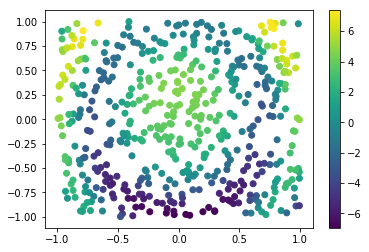

In [17]:
import random
from math import cos, pi

# make a training set and test set, consisting of subsets of the universe
n = 500
train_xs = [
    [ random.uniform(-1.0, 1.0), random.uniform(-1.0, 1.0)  ]
    for _ in range(n)
]
test_xs = [
    [ random.uniform(-1.0, 1.0), random.uniform(-1.0, 1.0)  ]
    for _ in range(n)
]
#print('xs', xs[0:5])


# make a secret function
def true_f(x):
    return x[0]**2 + 3*x[1] + 4* cos(2*pi*x[0]**2 + pi*x[1]**2)
train_ys = [ true_f(x) for x in train_xs]
test_ys = [ true_f(x) for x in test_xs]

from matplotlib import pyplot as plt
plt.figure()
plt.scatter([x[0] for x in train_xs], [x[1] for x in train_xs], c=train_ys)
plt.colorbar()
plt.show()

## Try a linear solver

In [6]:
from sklearn.linear_model import Ridge
model =Ridge(alpha=1.0, 
    # fit_intercept=True, normalize=False, copy_X=True, 
    # max_iter=None, tol=0.001, solver=’auto’, random_state=None
) 
model.fit(train_xs, train_ys)
model.score(test_xs, test_ys)

-0.012403286863405194

##  Now try some kernel methods
### Kernel Ridge Regression

In [20]:

from sklearn.kernel_ridge import KernelRidge
model = KernelRidge(alpha=1, 
    kernel="rbf", 
    #    gamma=None, degree=3, coef0=1, kernel_params=None
)
model.fit(train_xs, train_ys)
model.score(test_xs, test_ys)

0.43596396324438275

## Support Vector Regression

In [19]:
from sklearn.svm import SVR
model = SVR(kernel="rbf", 
    #degree=3, gamma=’auto_deprecated’, coef0=0.0, 
    tol=0.001, C=1.0, epsilon=0.1, shrinking=True, 
    #cache_size=200, verbose=False, max_iter=-1
)
model.fit(train_xs, train_ys)
model.score(test_xs, test_ys)

0.35356769956849365

## Gaussian Process Regression

This is popular with geographers, who refer to GPR with the RBF as "Kriging".

0.9562359240640771


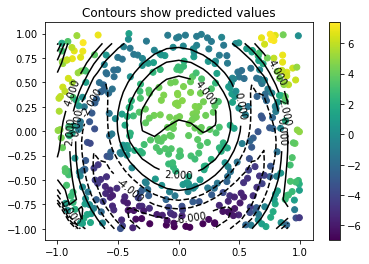

In [59]:
from sklearn.gaussian_process import GaussianProcessRegressor
model = GaussianProcessRegressor(kernel=None,  
    #alpha=1e-10, optimizer=’fmin_l_bfgs_b’, n_restarts_optimizer=0, 
    #normalize_y=False, copy_X_train=True, random_state=None
)
model.fit(train_xs, train_ys)
print(model.score(test_xs, test_ys))

import numpy
delta = 0.1
# meshgrids for drawing contour
X0, X1 = numpy.meshgrid(numpy.arange(-1.0, 1.0, delta), numpy.arange(-1.0, 1.0, delta))
# flatten and pair up, so we can predict
mesh_xs = list(zip( itertools.chain.from_iterable(X0), itertools.chain.from_iterable(X1)  ))
predicted = model.predict(list(mesh_xs))
# now marshall
Z = [ predicted[i*len(X0[0]):(i+1)*len(X0[0])] for i in range(len(X0))]

plt.figure()
plt.scatter([x[0] for x in train_xs], [x[1] for x in train_xs], c=train_ys)
plt.colorbar()
CS = plt.contour(X0, X1, Z, numpy.arange(-6.0, 6.0, 2.0) ,colors='k')
plt.clabel(CS, inline=1, fontsize=10)
plt.title('Contours show predicted values')
plt.show()

[Next](Tanimoto.ipynb)

Copyright STFC 2018 Author Chris Morris